/tmp/ipython-input-1299142470.py:15: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_df = pd.read_csv("AccidentsBig.csv")


Dataset Shape: (1048575, 30)


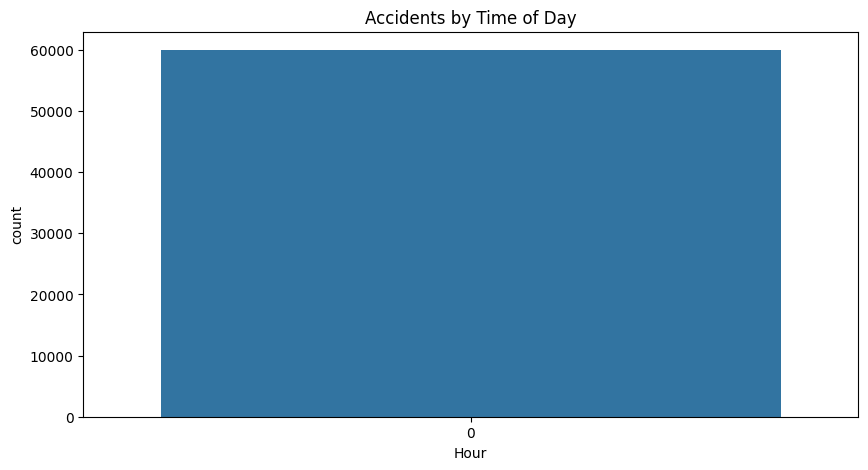

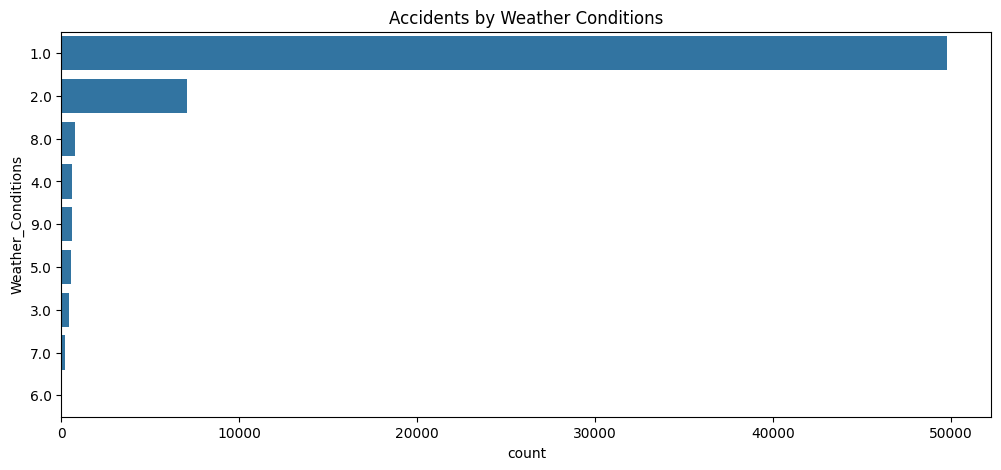

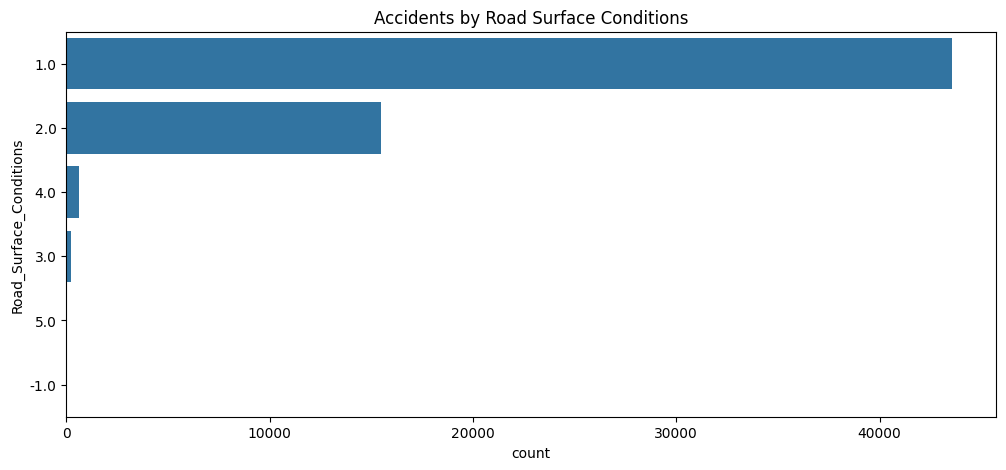

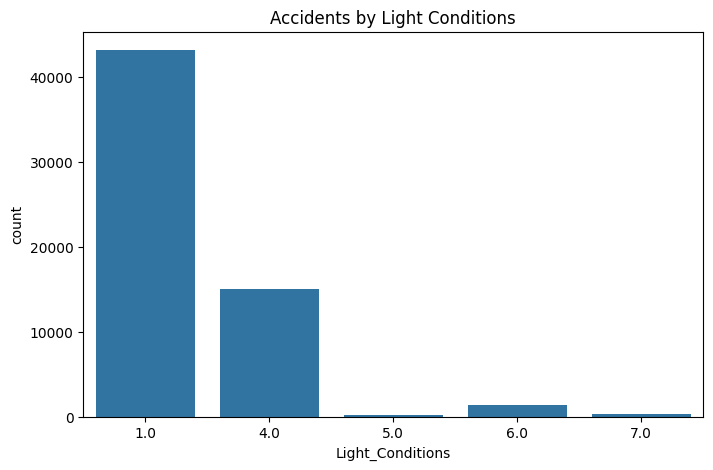

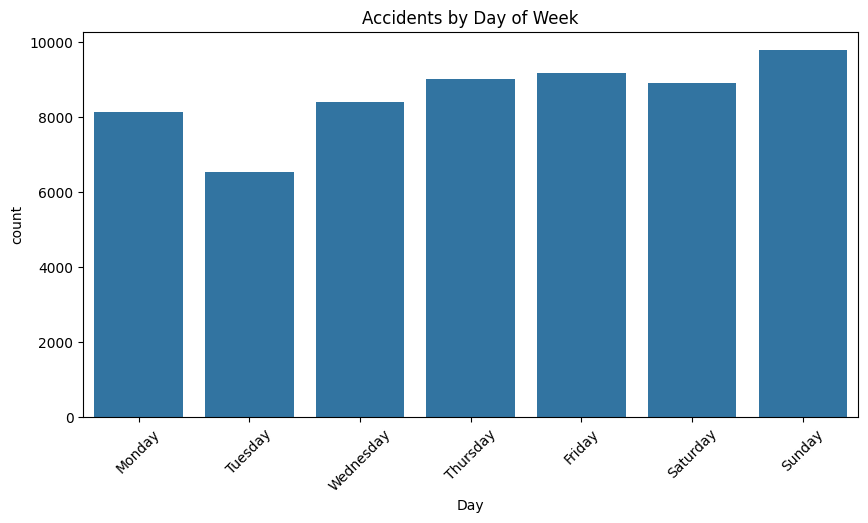

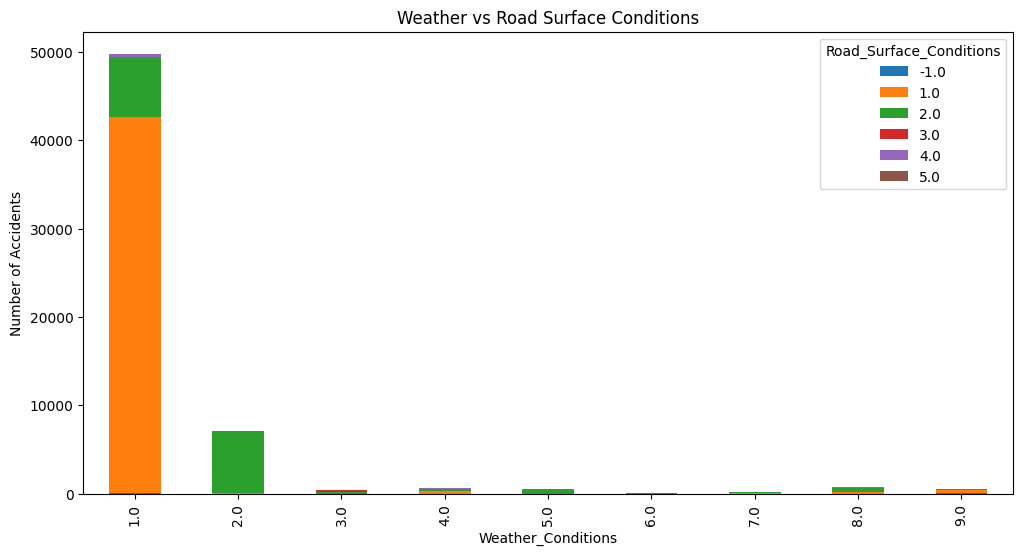

KEY INSIGHTS:
- Peak accidents occur during evening rush hours.
- Poor weather significantly increases accident risk.
- Wet and slippery road surfaces contribute to more accidents.
- Night-time accidents are higher due to low visibility.
- Certain locations show high accident concentration (hotspots).


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
accident_df = pd.read_csv("AccidentsBig.csv")
print("Dataset Shape:", accident_df.shape)
accident_df["Date"] = pd.to_datetime(
    accident_df["Date"],
    dayfirst=True,
    errors="coerce"
)
accident_df = accident_df.dropna(subset=["Date"])
accident_df["Hour"] = accident_df["Date"].dt.hour
accident_df["Day"] = accident_df["Date"].dt.day_name()
accident_df["Month"] = accident_df["Date"].dt.month
for col in ["Weather_Conditions", "Road_Surface_Conditions", "Light_Conditions"]:
    if col in accident_df.columns:
        accident_df[col] = accident_df[col].fillna("Unknown")
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=accident_df)
plt.title("Accidents by Time of Day")
plt.show()
plt.figure(figsize=(12,5))
sns.countplot(
    y="Weather_Conditions",
    order=accident_df["Weather_Conditions"].value_counts().index,
    data=accident_df
)
plt.title("Accidents by Weather Conditions")
plt.show()
plt.figure(figsize=(12,5))
sns.countplot(
    y="Road_Surface_Conditions",
    order=accident_df["Road_Surface_Conditions"].value_counts().index,
    data=accident_df
)
plt.title("Accidents by Road Surface Conditions")
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(x="Light_Conditions", data=accident_df)
plt.title("Accidents by Light Conditions")
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(
    x="Day",
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    data=accident_df
)
plt.title("Accidents by Day of Week")
plt.xticks(rotation=45)
plt.show()
if "Latitude" in accident_df.columns and "Longitude" in accident_df.columns:
    hotspot_map = folium.Map(
        location=[accident_df["Latitude"].mean(),
                  accident_df["Longitude"].mean()],
        zoom_start=6
    )

    HeatMap(
        accident_df[["Latitude","Longitude"]].dropna().values.tolist(),
        radius=8
    ).add_to(hotspot_map)

    hotspot_map
pd.crosstab(
    accident_df["Weather_Conditions"],
    accident_df["Road_Surface_Conditions"]
).plot(kind="bar", stacked=True, figsize=(12,6))

plt.title("Weather vs Road Surface Conditions")
plt.ylabel("Number of Accidents")
plt.show()
accident_df.to_csv("cleaned_accident_data.csv", index=False)
print("KEY INSIGHTS:")
print("- Peak accidents occur during evening rush hours.")
print("- Poor weather significantly increases accident risk.")
print("- Wet and slippery road surfaces contribute to more accidents.")
print("- Night-time accidents are higher due to low visibility.")
print("- Certain locations show high accident concentration (hotspots).")